### House Price Prediction Model using XGBoost analysis


In [188]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE

In [189]:
#Reading the data
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# EDA

In [190]:
# view the summary od the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [191]:
#checking for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing value in the dataset

In [192]:
# Descriptive statistics for the numeric column
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [193]:
# Correlation of each of the predictors with the target variable

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation with 'price'
correlation_with_price = numeric_df.corr()['price']
correlation_with_price

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

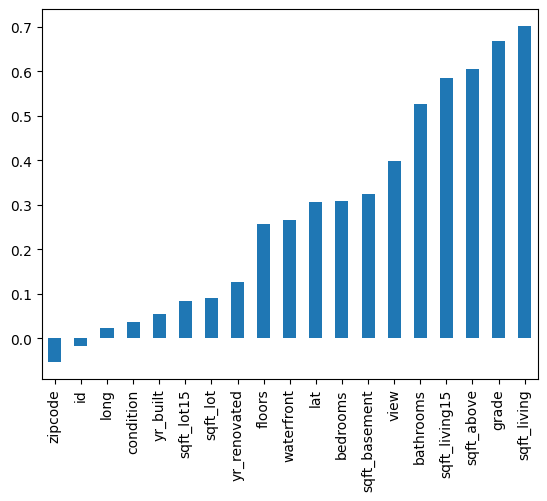

In [199]:
# Barchat for correlation values
correlation_with_price.sort_values().drop('price').plot(kind='bar')
plt.show()

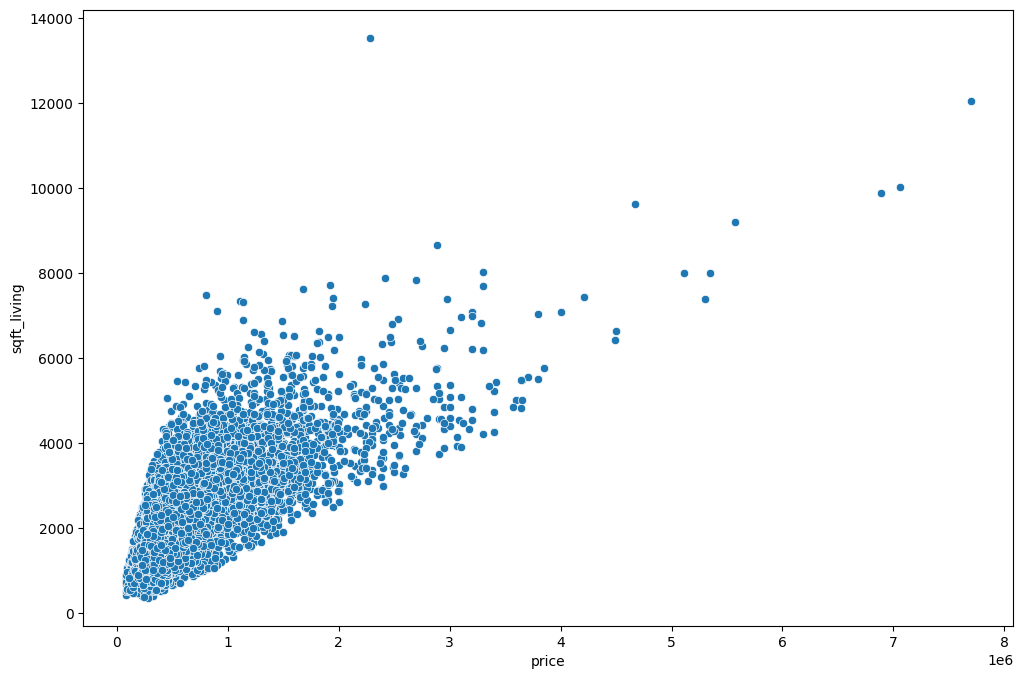

In [200]:
# Visualizing relationship between priceand sqft_living 
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)
plt.show()

Price increases with increase in square feet

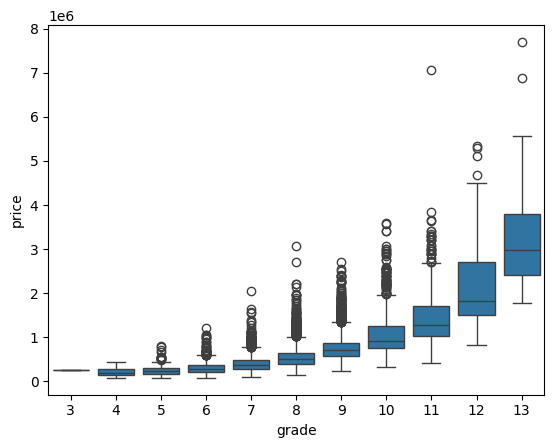

In [201]:
# Visualizing relation between price and grade
sns.boxplot(x='grade',y='price',data=df)
plt.show()

The price conspicousely increase with the grade

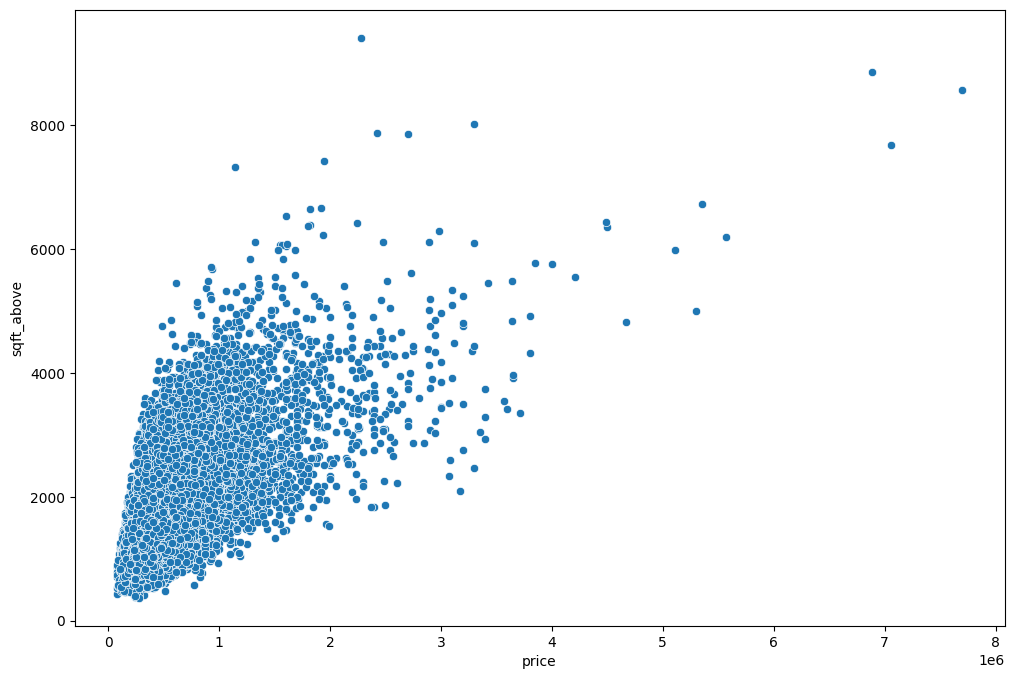

In [202]:
# Visualizing relation between price and sqft_above
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_above',data=df)
plt.show()

Price increses with increase in sqft above

In [152]:
# Exploring bathrooms
df['bathrooms']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21592    2.50
21593    2.50
21594    0.75
21595    2.50
21596    0.75
Name: bathrooms, Length: 21597, dtype: float64

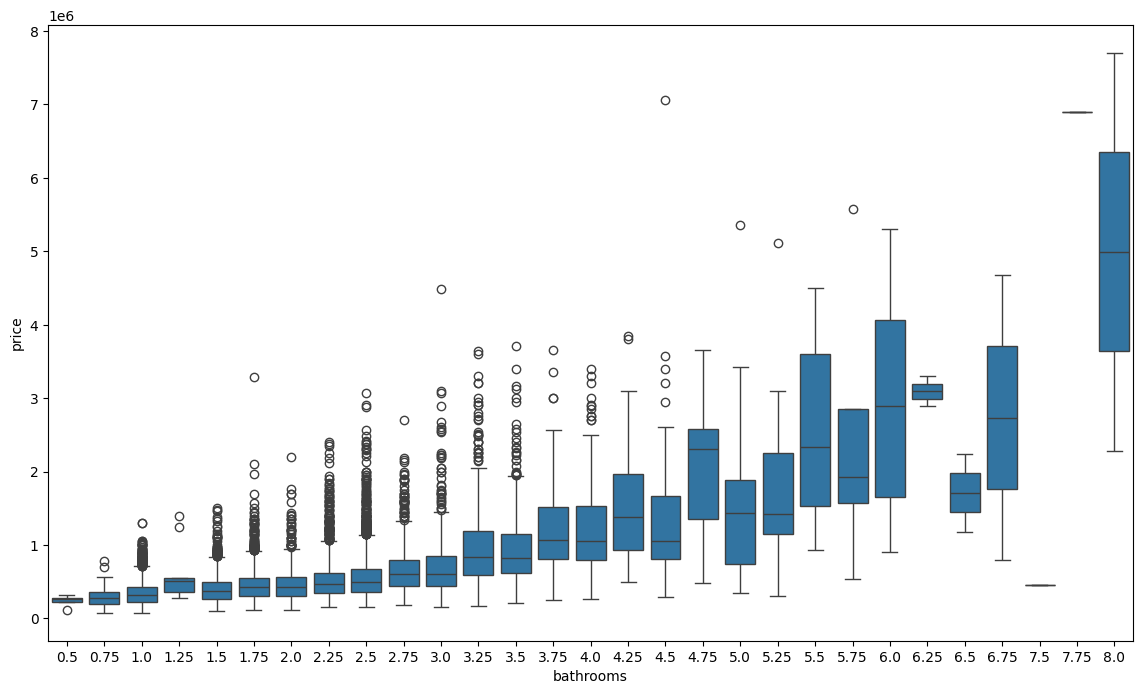

In [203]:
# Visualizing relationship between price and bathrooms
plt.figure(figsize=(14,8))
sns.boxplot(x='bathrooms',y='price',data=df)
plt.show()

The higher the no of bathrooms in a house the high the price

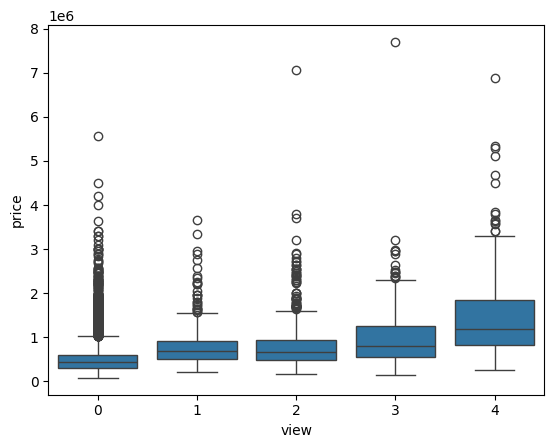

In [204]:
# Visualizing the distribution of 'price' for different categories of 'view'
sns.boxplot(x='view', y='price', data=df)
plt.show()

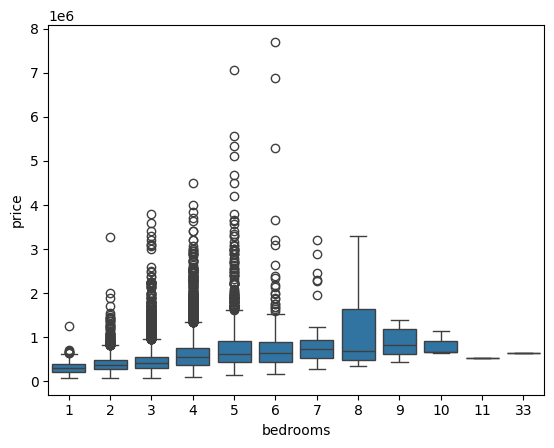

In [205]:
# Visualizing the distribution of 'price' for different categories of 'bedrooms
sns.boxplot(x='bedrooms',y='price',data=df)
plt.show()

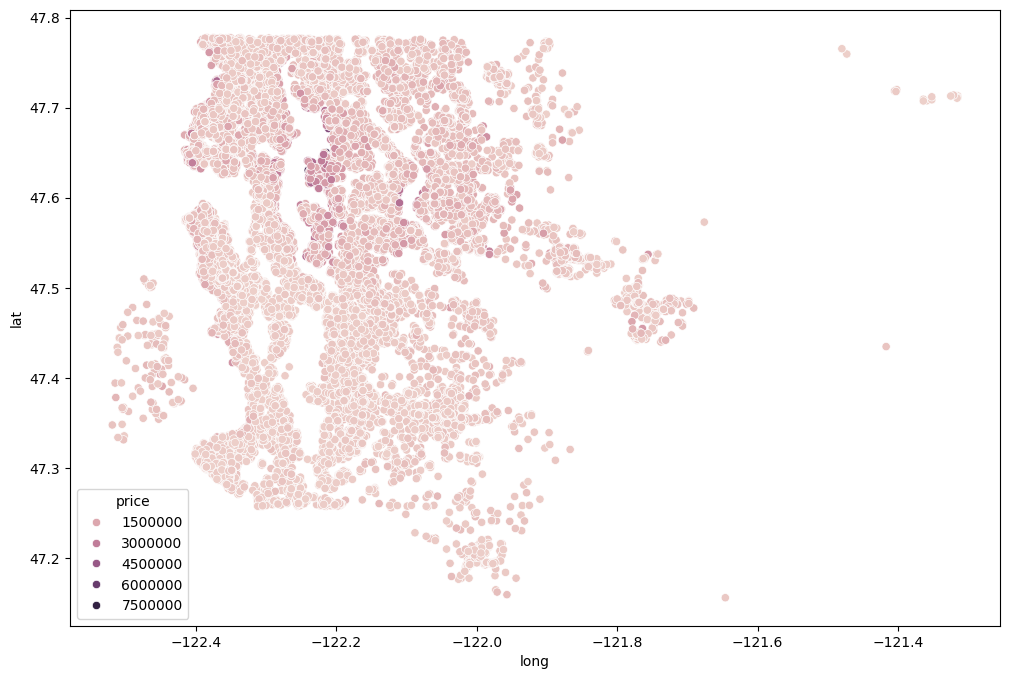

In [206]:
# Scatter plot of longitude (x) vs latitude (y), with points colored by 'price'
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')
plt.show()

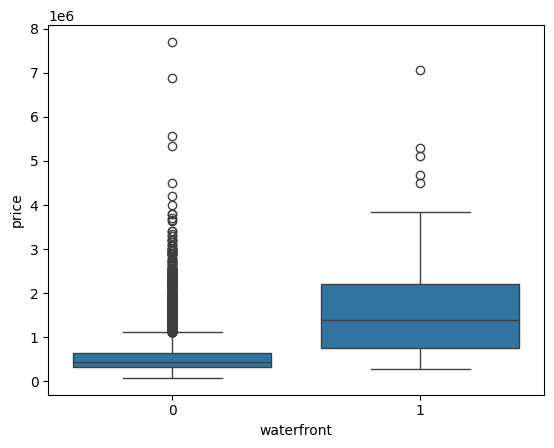

In [207]:
# Visualizing the distribution of 'price' for different categories of 'waterfront'
sns.boxplot(x='waterfront',y='price',data=df)
plt.show()

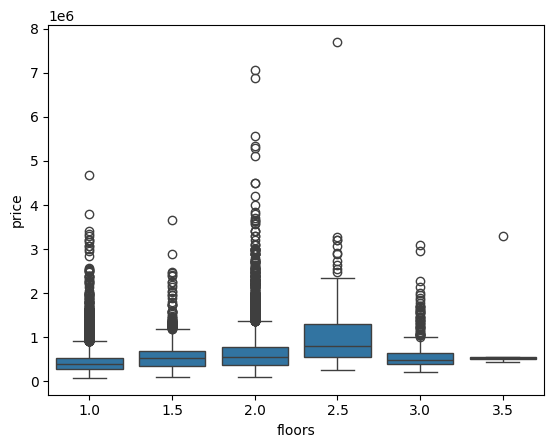

In [208]:
# Visualizing the distribution of 'price' for different categories of 'floors'
sns.boxplot(x='floors',y='price',data=df)
plt.show()

In [159]:
# Create a new DataFrame 'df_corr' with selected columns that may be relevant for correlation analysis
df_corr = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'waterfront']]

# Display the first 5 rows of the new DataFrame 'df_corr' to check the data
df_corr.head()


,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,waterfront
0,1180,7,1180,1340,1.00,0,0,3,0
1,2570,7,2170,1690,2.25,0,400,3,0
2,770,6,770,2720,1.00,0,0,2,0
3,1960,7,1050,1360,3.00,0,910,4,0
4,1680,8,1680,1800,2.00,0,0,3,0


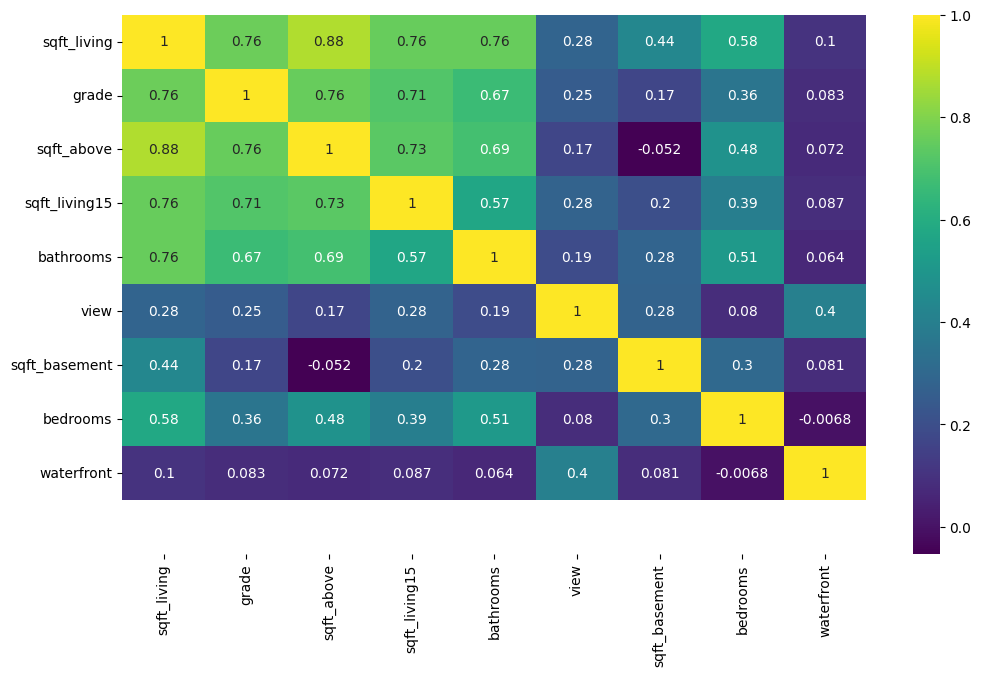

In [209]:
# Create a heatmap to visualize the correlation matrix of 'df_corr'
plt.figure(figsize=(12,7))
sns.heatmap(df_corr.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)
plt.show()

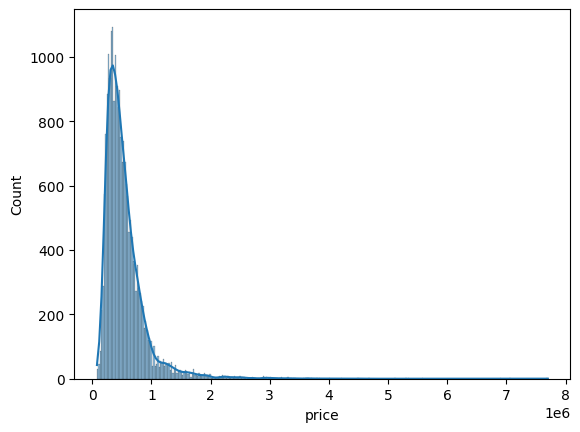

In [210]:
# Create a histogram of the 'price' column 
sns.histplot(df['price'], kde=True) 
plt.show()

In [162]:
# Exploring date 
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [211]:
# converting to date datatype
df['date'] = pd.to_datetime(df['date'])

In [212]:
# Extracting month from date column
df['month'] = df['date'].apply(lambda date:date.month)

In [213]:
# Extracting the year from date
df['year'] = df['date'].apply(lambda date:date.year)

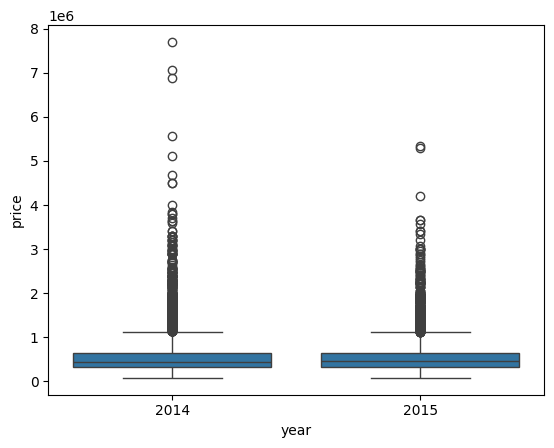

In [214]:
# Distribution of price over the years
sns.boxplot(x='year',y='price',data=df)
plt.show()

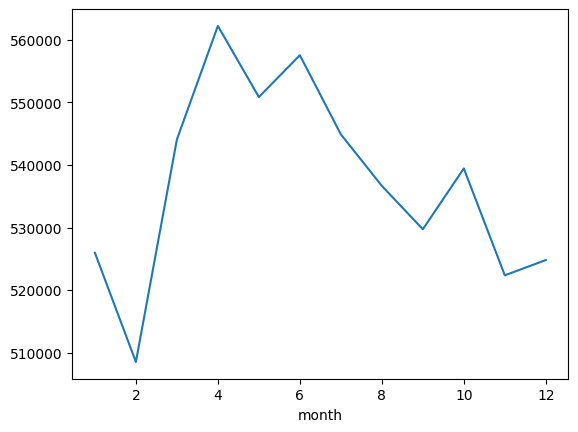

In [215]:
# Line plot to see trend of price by month
df.groupby('month').mean()['price'].plot()
plt.show()

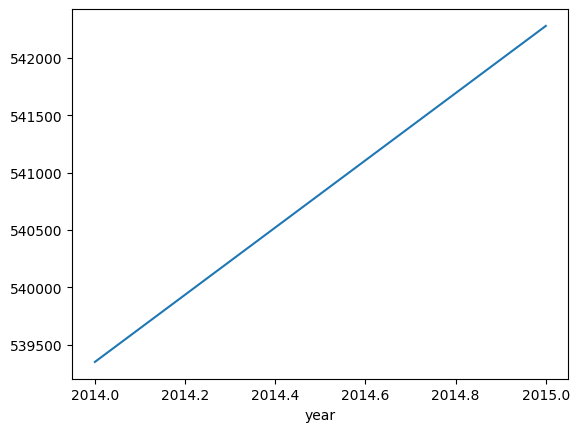

In [216]:
# Group the DataFrame by 'year' and calculate the mean 'price' for each year
df.groupby('year').mean()['price'].plot()
plt.show()

In [217]:
# dropping the date column as it generally has no correlation with price
df = df.drop('date',axis=1)

In [218]:
# Dropping Id as is just unique identifier and has no relationship with price, as confirmed by the correlation value
df = df.drop('id',axis=1)

In [219]:
# Count the number of occurrences of each unique value in the 'zipcode' column
df['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [220]:
# Dropping the zipcode column as it doesn't relate to price
df = df.drop('zipcode', axis=1)

In [221]:
# Viewing the first five rows ofthe resulting dataset
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [222]:
# Summary of the resulting dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  month 

## TRAIN TEST SPLIT

In [223]:
# importing train_test_split model
from sklearn.model_selection import train_test_split
X = df.drop('price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)

## MODEL TRAINING

In [224]:
# Initialize the XGBoost regressor with RMSLE (Root Mean Squared Logarithmic Error) as the evaluation metric
regressor = xgb.XGBRegressor(eval_metric='rmsle')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    "max_depth": [5, 6, 7],               # Maximum depth of the trees
    "n_estimators": [600, 700, 800],      # Number of boosting rounds (trees)
    "learning_rate": [0.01, 0.015, 0.020] # Step size shrinking to prevent overfitting
}

# Perform grid search with cross-validation to find the best hyperparameters
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

# Print the best hyperparameters found during the grid search
print("The best hyperparameters are ", search.best_params_)


The best hyperparameters are  {'learning_rate': 0.02, 'max_depth': 7, 'n_estimators': 800}


In [225]:
# Initialize the XGBoost regressor with the best hyperparameters found from GridSearchCV
regressor = xgb.XGBRegressor(
    learning_rate = search.best_params_["learning_rate"],  # Best learning rate
    n_estimators  = search.best_params_["n_estimators"],    # Best number of boosting rounds
    max_depth     = search.best_params_["max_depth"],       # Best maximum depth of trees
    eval_metric='rmsle'                                    # Evaluation metric: RMSLE
)

# Fit the regressor on the training data
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# MODEL EVALUATION

In [226]:
# Make predictions on the test set using the trained regressor
predictions = regressor.predict(X_test)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE) between the actual and predicted values
RMSLE = np.sqrt(MSE(y_test, predictions))

# Print the RMSLE score
print("The score is %f" % RMSLE)


The score is 126832.725913


In [227]:
# Import r2_score from sklearn.metrics if not already done
from sklearn.metrics import r2_score

# Calculate the R-squared (R²) score to evaluate the model's performance
R_Squared = r2_score(y_test, predictions)

# Print the R-squared score
print("The score is %f" % R_Squared)


The score is 0.881882


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

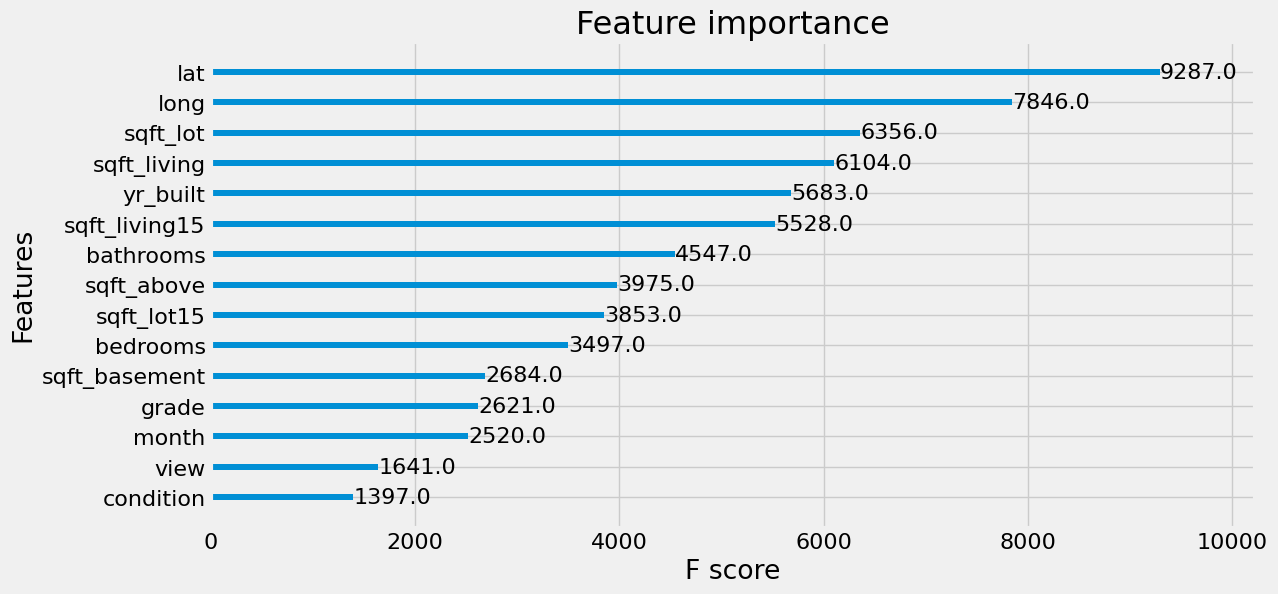

In [228]:
# Import necessary libraries
from xgboost import plot_importance
import matplotlib.pyplot as plt
# Set the plotting style and font size for better readability
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

# Create a subplot with a specified figure size (12x6 inches)
fig, ax = plt.subplots(figsize=(12,6))

# Plot feature importance for the trained XGBoost model
plot_importance(regressor, max_num_features=15, ax=ax)
plt.show()